# Tensorflow Regression - Housing Price Prediction

[House Sales in King County, USA](Houhttps://www.kaggle.com/harlfoxem/housesalesprediction)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read kc house data

In [ ]:
df =pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


# Exploratory Data Analysis

# check for any missing data

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

## Statistical report for the data

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.026700e+04,1.026700e+04,10267.000000,10267.000000,10267.000000,1.026700e+04,10267.000000,10267.000000,10267.000000,10267.000000,10267.000000,10267.000000,10267.000000,10266.000000,10266.000000,10266.000000,10266.000000,10266.000000,10266.000000,10266.000000
mean,4.541123e+09,5.324289e+05,3.365735,2.062287,2051.454174,1.590865e+04,1.432015,0.007889,0.237655,3.447258,7.594526,1749.101490,302.352683,1967.271868,91.006624,98077.841516,47.559765,-122.214164,1974.714884,13291.978375
std,2.863507e+09,3.747679e+05,0.909057,0.763287,907.828354,4.453824e+04,0.511560,0.088475,0.764631,0.665462,1.159626,807.900078,450.519239,27.977853,416.441549,53.926600,0.140214,0.139346,670.498284,27100.189956
min,1.000102e+06,8.000000e+04,1.000000,0.500000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.113200e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.439500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461925,-122.326000,1490.000000,5425.750000
50%,3.904921e+09,4.462500e+05,3.000000,2.000000,1890.000000,7.912000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573200,-122.230000,1830.000000,7840.000000
75%,7.256200e+09,6.390000e+05,4.000000,2.500000,2500.000000,1.112150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679500,-122.126000,2340.000000,10363.250000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


Let's explore the data visually

## use sns.distplot() on the price feature

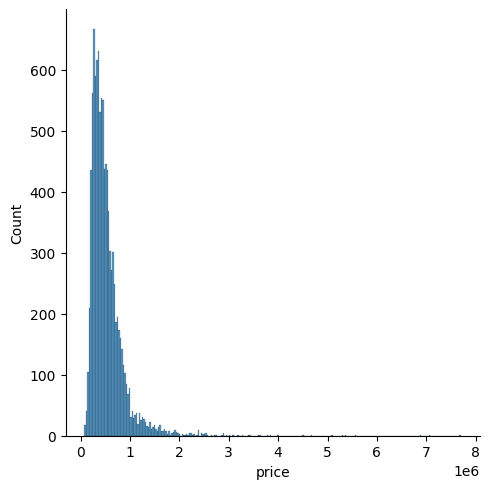

In [ ]:
sns.displot(df['price'])

We can see from the above chart, most of the house price fall between 0 to 2,000,000 USD. There are a few outliers which is beyond those prices. So realistically, we may want to drop those outliers as there are not so much houses with those price range in the market and it won't be very useful for our model's predictions.

## use sns.countplot() on bedrooms features

<Axes: xlabel='bedrooms', ylabel='count'>

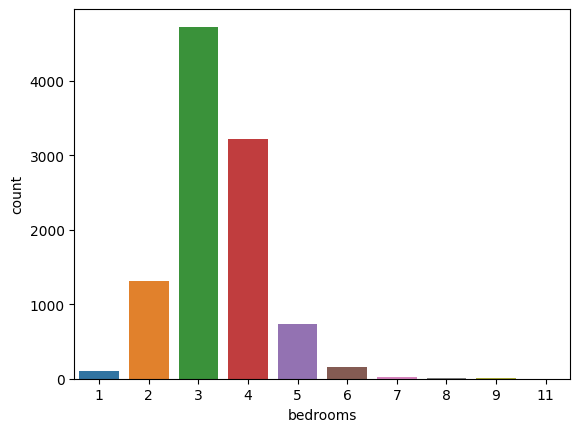

In [ ]:
sns.countplot(data=df, x='bedrooms')

Most of the houses have either 3 or 4 bedrooms. On extreme ends, there are some houses with 1 bedroom or 33 bedrooms.

In [ ]:
# check the correlation
df.corr()['price'].sort_values()

<ipython-input-21-bcc7b0138f7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.051383
id               0.005937
long             0.014904
yr_built         0.033527
condition        0.043663
sqft_lot15       0.087843
sqft_lot         0.091490
yr_renovated     0.144623
floors           0.276091
lat              0.298268
waterfront       0.298800
bedrooms         0.299980
sqft_basement    0.326125
view             0.401116
bathrooms        0.520569
sqft_living15    0.582609
sqft_above       0.605355
grade            0.650187
sqft_living      0.700564
price            1.000000
Name: price, dtype: float64

Seem like `sqft_living` is highly correlated with `price`. so what we can do is further explore those features using `scatterplot`.


## use sns.scatterplot on price and sqft_living

<Axes: xlabel='price', ylabel='sqft_living'>

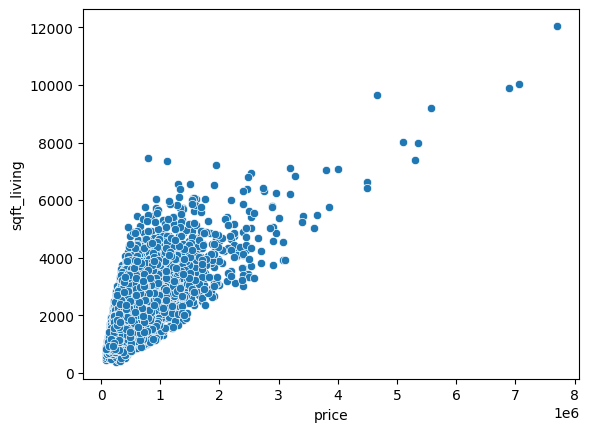

In [ ]:
sns.scatterplot(x=df['price'], y=df['sqft_living'])

We can see a strong positive linear relationship.


## sns.boxplot on bedrooms and price

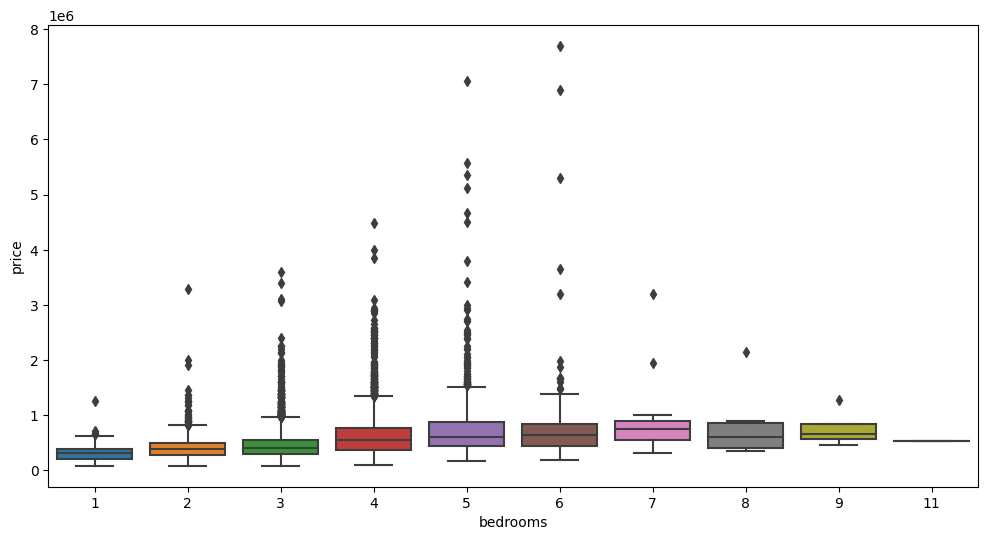

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='bedrooms', y='price');

As we already know majority of houses have bedrooms between 4 - 7, there are variety of prices for those range.

## Geographical Properties

###  let's see price distribution for price, long

<Axes: xlabel='price', ylabel='long'>

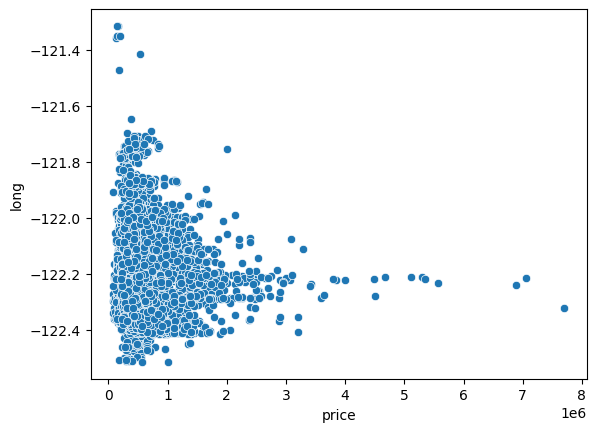

In [ ]:
sns.scatterplot(x=df['price'], y=df['long'])

We can see that around `long: -122.2`, there seem to be expensive houses. Becuase prices are much higher for those `long` values.

###  let's see price distribution for price, lat

<Axes: xlabel='price', ylabel='lat'>

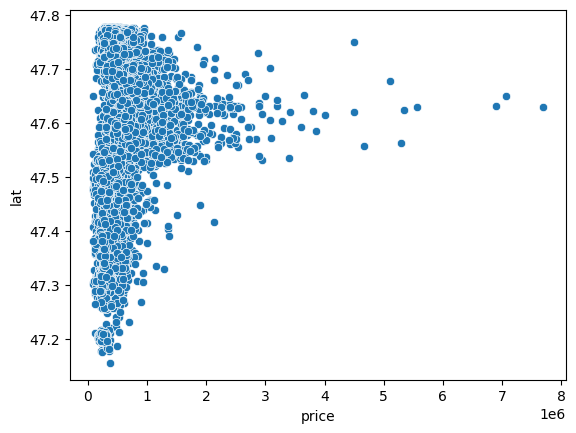

In [ ]:
sns.scatterplot(x=df['price'], y=df['lat'])

There is same behaviour with `lat` too. There are some sort of expensive houses between 47.6 and 47.7.

## Exploring for price hotspots

###  sns.scatterplot on long and lat and hue = price

<Axes: xlabel='long', ylabel='lat'>

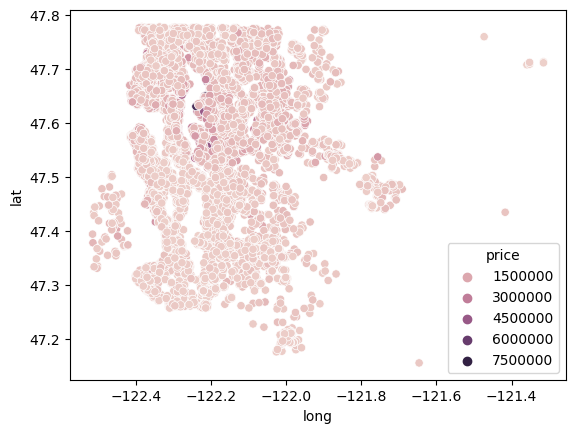

In [ ]:
sns.scatterplot(x='long', y='lat', data= df ,hue = 'price')

We can see that there are some hotspot areas. However, the distribution is not very clear.

We can see that maximum house price is around 7.7 millions and the price quickly drop to the range of 3 millions. So we can set the cut off point at 3 millions as there are not so much houses beyond those price ranges.

---



If we calculate TOP 1% of houses, there are about 216 houses.

As our scatterplot hotspot is impacted by those outliers, we want to exclude those outliers houses when we do the visual exploration.

So let's create a dataframe excluding those Top 1 % houses, meaning we will be grabbing bottom 99% houses.

Now we can see a lot clearer color distribution (no longer influenced by those expensive outliers hourses).

# Feature Engineering - Working with Feature Data

## features info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10267 entries, 0 to 10266
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10267 non-null  int64  
 1   date           10267 non-null  object 
 2   price          10267 non-null  float64
 3   bedrooms       10267 non-null  int64  
 4   bathrooms      10267 non-null  float64
 5   sqft_living    10267 non-null  int64  
 6   sqft_lot       10267 non-null  int64  
 7   floors         10267 non-null  float64
 8   waterfront     10267 non-null  int64  
 9   view           10267 non-null  int64  
 10  condition      10267 non-null  int64  
 11  grade          10267 non-null  int64  
 12  sqft_above     10267 non-null  int64  
 13  sqft_basement  10267 non-null  int64  
 14  yr_built       10266 non-null  float64
 15  yr_renovated   10266 non-null  float64
 16  zipcode        10266 non-null  float64
 17  lat            10266 non-null  float64
 18  long  

### Id column is not really helpful for us, so we will drop it

In [ ]:
# Id column is not really helpful for us, so we will drop it
df = df.drop('id', axis=1)

### Feature Engineering from Date

In [ ]:
# Date column
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
10262     3/16/2015
10263     9/24/2014
10264     9/22/2014
10265      1/7/2015
10266     8/18/2014
Name: date, Length: 10267, dtype: object

We can see that `date` column is object type and we can convert it to datetime type.

In this way, we can extract date related information easily.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
10262   2015-03-16
10263   2014-09-24
10264   2014-09-22
10265   2015-01-07
10266   2014-08-18
Name: date, Length: 10267, dtype: datetime64[ns]

In [ ]:
# Extracting information from date column
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [ ]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12


### Explore whether there is any seasonal sales related to Month

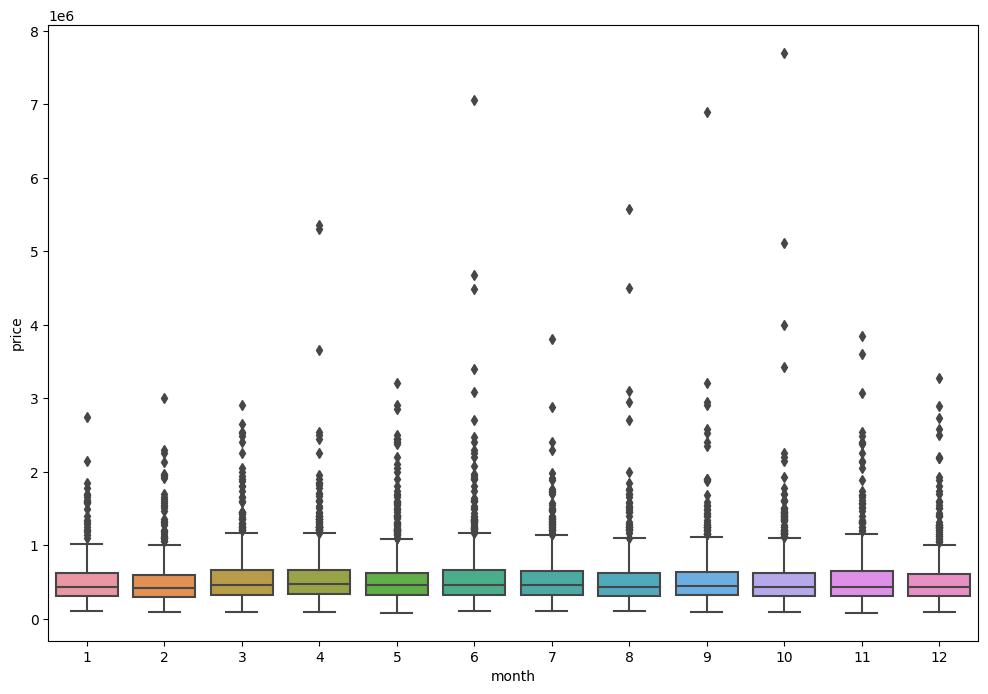

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='month', y='price');

From the boxplot itself, it is hard to tell whether for specific month, price is more expensive.

So let's look at the data itself.

In [ ]:
df.groupby('month').mean()['price']

<ipython-input-35-93396d665159>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price']


month
1     506049.236025
2     498299.122112
3     543585.682682
4     557768.398482
5     528206.384351
6     556275.580492
7     527782.042898
8     516110.914966
9     529638.352273
10    533744.405213
11    546051.503106
12    515971.295359
Name: price, dtype: float64

<ipython-input-36-513a8acf2abc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot();


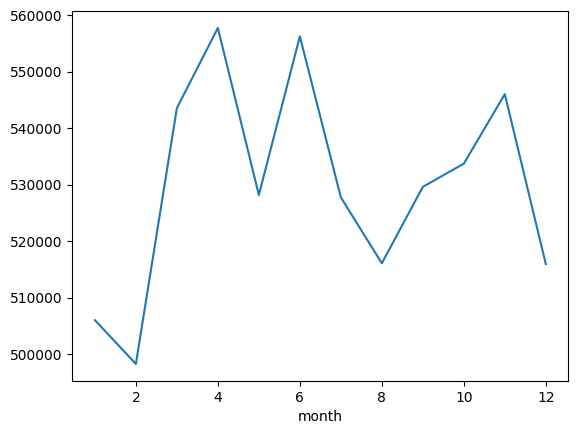

In [ ]:
df.groupby('month').mean()['price'].plot();

<ipython-input-37-4f4f33707ef9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot();


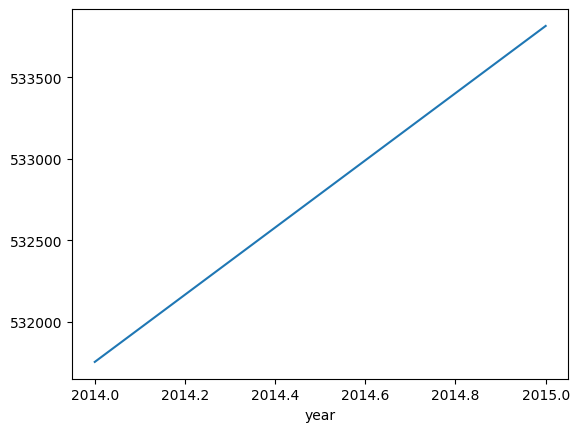

In [ ]:
df.groupby('year').mean()['price'].plot();

As the date column is no longer necessary, we will drop it.

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12


### Zipcode column

In [ ]:
df['zipcode'].value_counts()

98038.0    282
98052.0    282
98115.0    281
98034.0    277
98117.0    267
          ... 
98109.0     49
98024.0     47
98102.0     45
98148.0     29
98039.0     16
Name: zipcode, Length: 70, dtype: int64

What we can further do is to map the expensive zip codes and inexpensive zip code areas categories. For this one, it will be helpful to approach domain expert.

In [ ]:
# for this project, we will drop zipcode.

df = df.drop('zipcode', axis=1)

### yr_renovated column

We can see there a lot of houses have `0` value which indicate `no rennovation`. So it makes more sense to have `has renovate: YES/NO` value rather than the year iteself.

However on the flip side, we can intuitively think that `more recently renovated houses will have higher values`. Those houses are associated with high number of year. The smaller the year value (meaning the not very recently renovated), it is likely that prices can be lower. So for NO RENOVATION HOUSES with 0 value is alinged with it.  0 => 1944 => 2000 => 2014, the price can get higher.

So we don't really need to make any changes for this column and leave it like that.

In [ ]:
df['yr_renovated'].value_counts()

0.0       9798
2014.0      54
2005.0      23
2013.0      21
2003.0      20
          ... 
1957.0       1
1956.0       1
1954.0       1
1976.0       1
1946.0       1
Name: yr_renovated, Length: 64, dtype: int64

### sqft_basement

There is a similar situation with `sqft_basement` column too.

In [ ]:
df['sqft_basement'].value_counts()

0       6159
700      112
600      111
500      109
400      105
        ... 
1960       1
588        1
2100       1
3000       1
3260       1
Name: sqft_basement, Length: 239, dtype: int64

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0,2014,12


# Scaling and Train Test Split

In [ ]:
# separate Features and Labels
# tensor can only work with numeric array, not with pandas series or dataframe
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('price', axis=1).values

In [ ]:
y = df['price']

train_test_split

In [ ]:
xtrain ,xtest, ytrain, ytest =train_test_split(x,y,test_size=0.3,random_state=20)

## Scaling

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)

In [ ]:
x_train_scaled.min(),x_train_scaled.max(),x_test_scaled.min(),x_test_scaled.max()

(nan, nan, -3.0, 2015.0)

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965.0,0.0,47.5208,-122.393,1360.0,5000.0,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,208000.0,3,1.00,920,7314,1.0,0,0,3,6,920,0,1960.0,0.0,47.2892,-122.220,1010.0,7420.0,2015,3
10263,325000.0,4,2.00,1780,10622,1.0,0,0,4,7,900,880,1976.0,0.0,47.4573,-122.158,1550.0,8900.0,2014,9
10264,597157.0,7,4.00,2690,10880,1.0,0,0,4,8,2690,0,1960.0,0.0,47.6787,-122.168,1840.0,10836.0,2014,9
10265,728725.0,4,2.50,3010,3120,2.5,0,2,3,8,3010,0,2006.0,0.0,47.5539,-121.996,2140.0,3840.0,2015,1


## print shapes of data

In [ ]:
x_train_scaled.shape

(7186, 19)

**We can see that there are 19 incoming features, so it is best to have at least 19 neurons in our model.**

In [ ]:
 # input layer
model = Sequential()
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
 # output layer
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mse' )

## Training the Model

### Why passing `validation data` is good?

* When fitting the model, validation data can be passed too.

* What it means is after each epoch training on training data, it gonna quickly run the test data and check our loss on the test data.

* In this way, we can keep a tracking of how well performing our model not just on our training data, but also on test data.

* But Keep in mind that this test data will not have any impact on weights and bias of our network.

---------

### `batch_size`
* NOTE: for `batch_size`, it is typical to use `2^(n)` values like 64, 128, etc.
* the smaller the batch_size, the longer it takes to train. However, it is likely to overfit your data because you are not passing your entire dataset at once. Instead, you are focusing on smaller batches.

In [ ]:
# fit the model
model.fit(x=x_train_scaled , y=ytrain, epochs=400, batch_size=256,validation_data=(x_test_scaled,ytest) , verbose=1 )

Epoch 1/400
60/60 [==============================] - 1s 6ms/step - loss: 433333370880.0000 - val_loss: 411695644672.0000
Epoch 2/400
60/60 [==============================] - 0s 4ms/step - loss: 433180409856.0000 - val_loss: 411293614080.0000
Epoch 3/400
60/60 [==============================] - 0s 3ms/step - loss: 432165945344.0000 - val_loss: 409225134080.0000
Epoch 4/400
60/60 [==============================] - 0s 3ms/step - loss: 428760793088.0000 - val_loss: 403789021184.0000
Epoch 5/400
60/60 [==============================] - 0s 4ms/step - loss: 421206818816.0000 - val_loss: 393571106816.0000
Epoch 6/400
60/60 [==============================] - 0s 3ms/step - loss: 409286639616.0000 - val_loss: 380949856256.0000
Epoch 7/400
60/60 [==============================] - 0s 3ms/step - loss: 398041022464.0000 - val_loss: 372224655360.0000
Epoch 8/400
60/60 [==============================] - 0s 4ms/step - loss: 390236635136.0000 - val_loss: 365971243008.0000
Epoch 9/400
60/60 [=============

We can see that loss is getting smaller and smaller.

### Explore what our training history looks like and Whether it is overfitting or not


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head(5)

,loss,val_loss
0,4.333334e+11,4.116956e+11
1,4.331804e+11,4.112936e+11
2,4.321659e+11,4.092251e+11
3,4.287608e+11,4.037890e+11
4,4.212068e+11,3.935711e+11


<Axes: >

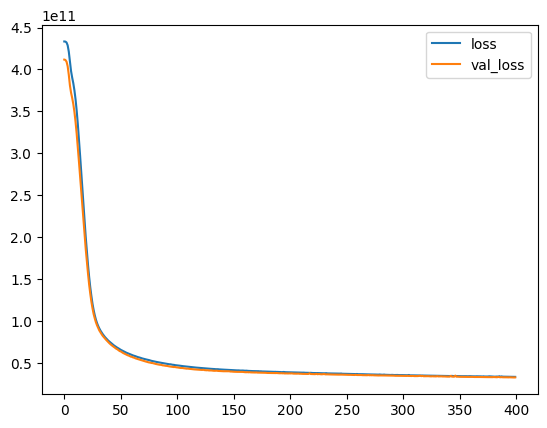

In [ ]:
loss_df.plot()

We can see that there is no spike in `orange line (val_loss)`, we can probably continue training. However when we look at the val_loss, there is not much improvment and even the improvement value is very tiny after a certain epoch.

**NOTE: It is important to look for any spike, which indicates that our model is overfitting.**

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

### Get predictions on Test Data

In [ ]:
predictions = model.predict(xtest)

203/203 [==============================] - 0s 1ms/step


### Get evaluations of MAE, MSE, RMSE

In [ ]:
mean_absolute_error(ytest, predictions)

443776678.2734568

In [ ]:
mean_squared_error(ytest, predictions)

2.5131095550114675e+17

In [ ]:
np.sqrt(mean_squared_error(ytest, predictions))

501309241.38813436

So we already have MAE, MSE, RMS. Are they good or bad?

We need to take into account of the mean value of the price.

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
5.402966e+05

540296.6

In [ ]:
( 102398.41599151235 / 5.402966e+05 ) * 100

18.952259923810804

If we look at the ratio of MAE to average price of the house, we are off by around 19%. This is not Great, but not horrible either.

So w can use `explained_variance_score` to get deeper understading.


### explained_variance_score

In [ ]:
explained_variance_score(ytest, predictions)

-435809.5214916015

The best possible value is 1.0 and our is around 0.797. To see whether this is good or bad again, we need to look at the whole context.

If we have a previous model, we might want to compare this value to see whether our model is getting better or wrose.


### Visualization of True value and Predictions

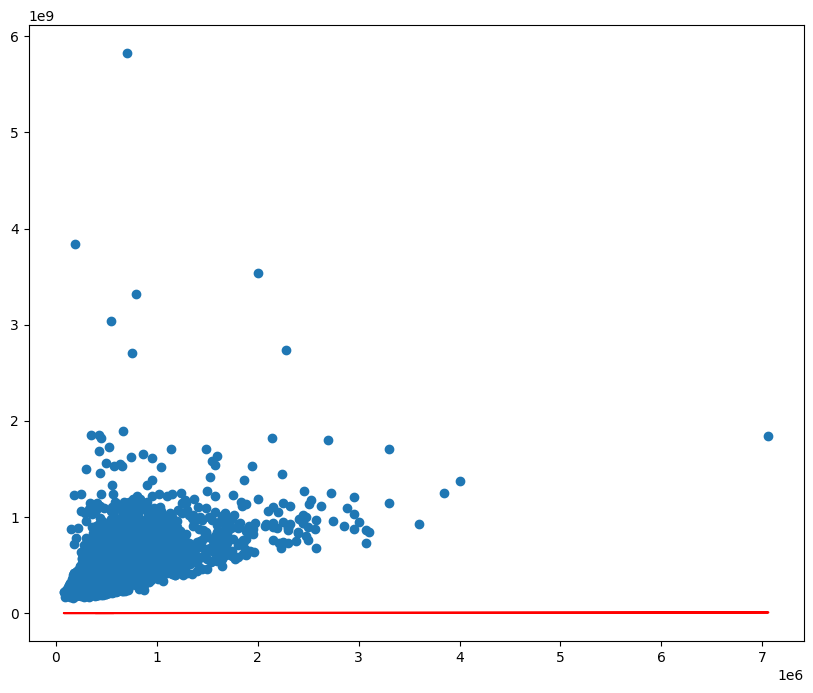

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ytest, predictions);
plt.plot(ytest, ytest, color='r'); #perfect line

We can see that our model is generally performing well on houses of prices (0 - 2,000,000 USD). But for very expensive houses, our model is not really doing well.

# Predictions on Brand New House

In [ ]:
# let's use the very first house
new_house = df.drop('price', axis=1).iloc[0]

new_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [ ]:
new_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

We can see that shape is is still not correct. So we need to reshape it.

-1 means keep those old dimensions along that axis.

In [ ]:
new_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [ ]:
# as our model is trained on scale data, we need to scale the features too.
new_house = scaler.transform(new_house.values.reshape(-1,19))

In [ ]:
# make a prediction
model.predict(new_house)

1/1 [==============================] - 0s 23ms/step


array([[308926.97]], dtype=float32)

In [ ]:
# true value
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


It seem like our model is overshooting.


What we can further do is
* drop those extreme 1 or 2 expensive houses.
* retrain the model and check whether MAE value is reduced or not.